In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def to_causal_matrix(_df, variables):
    df_causal_matrix = pd.DataFrame(0, index=variables, columns=variables)
    for _, row in _df.iterrows():
        df_causal_matrix.loc[row['Cause'], row['Effect']] = 1
    return df_causal_matrix


labels = [
    'audio_Clock', 'audio_Motorcycle', 'audio_Train horn', 'audio_Bark', 'audio_Cat',
    'audio_Bus', 'audio_Rodents/rats', 'audio_Toilet flush', 'audio_Acoustic guitar', 'audio_Frying (food)',
    'audio_Chainsaw', 'audio_Horse', 'audio_Helicopter', 'audio_Infant cry', 'audio_Truck',
    'visual_Clock', 'visual_Motorcycle', 'visual_Train horn', 'visual_Bark', 'visual_Cat',
    'visual_Bus', 'visual_Rodents/rats', 'visual_Toilet flush', 'visual_Acoustic guitar', 'visual_Frying (food)',
    'visual_Chainsaw', 'visual_Horse', 'visual_Helicopter', 'visual_Infant cry', 'visual_Truck'
]

_df_400 = pd.read_csv("causalgraph/grasp_400.csv", index_col=0)
_df_500 = pd.read_csv("causalgraph/causal_500.csv", index_col=0)
_df_600 = pd.read_csv("causalgraph/causal_600.csv", index_col=0)
_df_700 = pd.read_csv("causalgraph/causal_700.csv", index_col=0)
_df_800 = pd.read_csv("causalgraph/causal_800.csv", index_col=0)
_df_900 = pd.read_csv("causalgraph/causal_900.csv", index_col=0)
_df_base = pd.read_csv("causalgraph/grasp_causal_baseline.csv", index_col=0)

df_c400 = to_causal_matrix(_df_400, labels)
df_c500 = to_causal_matrix(_df_500, labels)
df_c600 = to_causal_matrix(_df_600, labels)
df_c700 = to_causal_matrix(_df_700, labels)
df_c800 = to_causal_matrix(_df_800, labels)
df_c900 = to_causal_matrix(_df_900, labels)


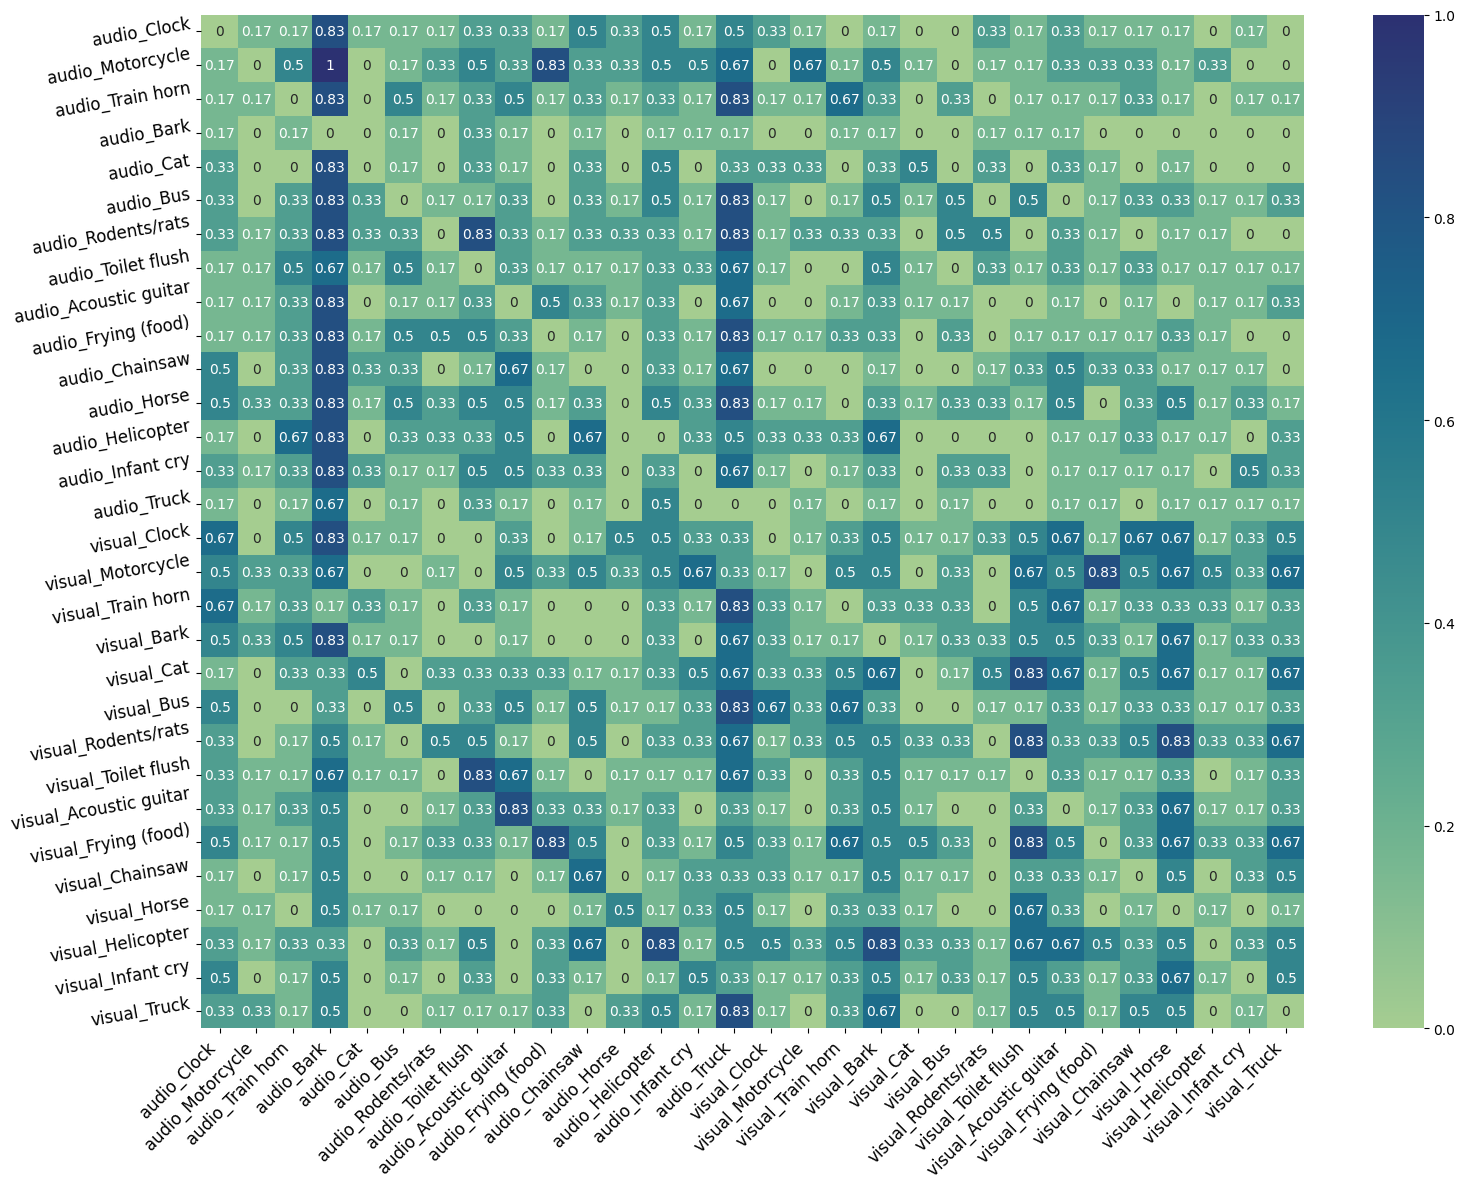

In [2]:
threshold = 0
stacked = np.stack([df_c400.values, df_c500.values, df_c600.values, df_c700.values, df_c800.values, df_c900.values])
frequency = np.sum(stacked > threshold, axis=0) / stacked.shape[0]  # threshold = 0 if binary

plt.figure(figsize=(16, 12))  # Set the figure size

ax = sns.heatmap(frequency, annot=True, cmap='crest')

# Optionally, set custom tick labels if needed
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(labels, rotation=10, ha='right',fontsize=12)
# plt.setp(ax.get_yticklabels(), va="center")  # Center y-tick labels vertically[6]

plt.tight_layout()
plt.show()


In [ ]:
import networkx as nx

def subgraph_generate(filtered_df):

    G = nx.DiGraph()

    for index, row in filtered_df.iterrows():
        G.add_edge(row['Cause'], row['Effect'])

    edge_colors = []
    node_colors = []
    font_colors = {}
    for node in G.nodes():
        if node.startswith('audio_'):
            edge_colors.append('blue') 
            node_colors.append('lightblue')   
            font_colors[node] = 'black'   
        elif node.startswith('visual_'):
            node_colors.append('lightgreen')    
            edge_colors.append('green') 
            font_colors[node] = 'black'    

    new_labels = {node: node.replace('audio_', '').replace('visual_', '') for node in G.nodes()}
    pos = nx.spring_layout(G, k=0.9, seed=42)  # Adjust k for more/less spacing

    # Plot the graph
    plt.figure(figsize=(10, 10))  

    # Draw nodes with the specified light colors
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500, edgecolors=edge_colors, linewidths=0.6)

    # Draw labels with adjusted colors
    for node, (x, y) in pos.items():
        label = new_labels[node]
        plt.text(x, y, label, fontsize=27, fontfamily='sans-serif', color=font_colors[node],
                 verticalalignment='center', horizontalalignment='center')

    # Draw edges with arrowheads
    nx.draw_networkx_edges(
        G, 
        pos, 
        arrowstyle='-|>',   
        arrowsize=40,       
        width=0.8,          
        connectionstyle='arc3, rad=0.3'  
    )

    plt.axis('on')
    plt.show()

filtered_df1 = _df_base[_df_base["Cause"].isin(["audio_Motorcycle"])]  #cause is "audio_Motorcycle"
subgraph_generate(filtered_df1)

filtered_df2 = _df_base[_df_base["Cause"].isin(["visual_Train horn"])]  
subgraph_generate(filtered_df2)

filtered_df3 = _df_base[_df_base["Effect"].isin(["visual_Bus"])]  
subgraph_generate(filtered_df3)
